In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import *
warnings.filterwarnings('ignore')


# Setting the maximum number of displayed columns to 'None' (unlimited)
pd.set_option("display.max_columns", None)

# Setting the maximum number of displayed rows to 'None' (unlimited)
pd.set_option("display.max_row", None)

In [2]:
# Reading clean_openFDA file
df_openFDA = pd.read_csv('../clean_openFDA.csv')

In [3]:
# Checking dataframe structure
df_openFDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8724 entries, 0 to 8723
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   8724 non-null   int64  
 1   state                        8724 non-null   object 
 2   root_cause_description       8724 non-null   object 
 3   openfda.device_class         8724 non-null   object 
 4   time_duration                8724 non-null   int64  
 5   event_month_posted           8724 non-null   int64  
 6   event_year_posted            8724 non-null   int64  
 7   day_of_week_posted           8724 non-null   int64  
 8   event_month_terminated       8724 non-null   int64  
 9   event_year_terminated        8724 non-null   int64  
 10  day_of_week_terminated       8724 non-null   int64  
 11  product_quantity_cleaned     8724 non-null   int64  
 12  cost_to_recall_in_dollers    8724 non-null   float64
 13  distribution      

In [4]:
# Checking number of columns and rows
df_openFDA.shape

(8724, 17)

In [5]:
# Dropping column "Unnamed: 0"
df_openFDA = df_openFDA.drop('Unnamed: 0', axis=1)

# Checking dataframe again
df_openFDA.head()

,state,root_cause_description,openfda.device_class,time_duration,event_month_posted,event_year_posted,day_of_week_posted,event_month_terminated,event_year_terminated,day_of_week_terminated,product_quantity_cleaned,cost_to_recall_in_dollers,distribution,cleaned_reason_for_recall,cleaned_product_description,cleaned_action
0,IL,Device Design,Class II,648,11,2007,5,8,2009,2,311,248800.00,Worldwide distribution,biologic system corp camera pole may weaken an...,biologic system corp telescoping camera pole a...,biologic sent a safety alert letters dated to...
1,WA,Software design,Class III,641,1,2009,0,10,2010,4,19,16264.00,Nationwide distribution,an issue associated with the timed scan applic...,neuviz dual multislice computed tomography ct ...,a letter was issued to customers prior to the ...
2,CA,Device Design,Class III,415,10,2009,0,11,2010,2,2246,1078080.00,Worldwide distribution,failure product can kink or ovalize which may ...,penumbra neuron delivery catheter percutaneo...,the firm issued an urgent voluntary field remo...
3,IL,Device Design,Class II,776,10,2010,1,11,2012,0,221097,4421.94,Nationwide distribution,the fda sent a letter to baxter on april ord...,baxter colleague single channel volumetric inf...,baxter healthcare corporation sent urgent prod...
4,CO,Labeling design,Class II,0,10,2011,0,10,2011,0,6,5562.00,Worldwide distribution,distal end of tactile probe may break off duri...,probe tactile left asm long \npart s \nmedtron...,medtronic sent an urgent product safety notice...


## Clustering
### Clustering - KMeans

In [9]:
# Selecting numerical datatypes
num_col = df_openFDA[['time_duration', 
                      'product_quantity_cleaned', 
                      'cost_to_recall_in_dollers']].columns

# Displaying the columns that are considered numerical
num_col

Index(['time_duration', 'product_quantity_cleaned',
       'cost_to_recall_in_dollers'],
      dtype='object')

In [10]:
df_openFDA[num_col].head(10)

,time_duration,product_quantity_cleaned,cost_to_recall_in_dollers
0,648,311,248800.00
1,641,19,16264.00
2,415,2246,1078080.00
3,776,221097,4421.94
4,0,6,5562.00
5,1074,1602,714492.00
6,1654,10,8730.00
7,835,129,117519.00
8,776,81775,1308400.00
9,0,6,4872.00


In [11]:
# Importing MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# Creating an instance of MinMaxScaler
scale = MinMaxScaler()

# Scaling the selected numeric columns (num_col) in the DataFrame (df_openFDA)
df_scaled = scale.fit_transform(df_openFDA[num_col])

# Creating a new DataFrame with the scaled data and specifying column names
df_scaled = pd.DataFrame(df_scaled, columns=['time_duration', 'product_quantity_cleaned', 'cost_to_recall_in_dollars'])

# Displaying the first few rows of the scaled DataFrame
df_scaled.head(10)


,time_duration,product_quantity_cleaned,cost_to_recall_in_dollars
0,0.202055,2.325133e-06,0.037202
1,0.199875,1.420499e-07,0.002432
2,0.129514,1.679179e-05,0.161201
3,0.241905,1.652990e-03,0.000661
4,0.000311,4.485786e-08,0.000832
5,0.334682,1.197705e-05,0.106835
6,0.515255,7.476310e-08,0.001305
7,0.260274,9.644440e-07,0.017572
8,0.241905,6.113753e-04,0.195640
9,0.000311,4.485786e-08,0.000728


### Hopkins Statistics check

In [12]:
# Calculating the Hopkins statistic

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []

    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),
                                            np.amax(X,axis=0),
                                            d).reshape(1, -1), 
                                            2, 
                                            return_distance=True)
        
        ujd.append(u_dist[0][1])
        
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1),
                                    2, 
                                    return_distance=True)
        
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [13]:
hopkins(df_openFDA[num_col])

0.9999715428735001

#### Inferences:
- The value of hopkins Statistics is Close to 1, then we can reject the null hypothesis and conclude that the dataset is significantly a clusterable data.

### K-Mean Clustering
To Choose the value of k, we have:
- Elbow Curve-SSD
- Sihouette Score 

#### Finding the optimal Number of Clusters
- Elbow Curve-SSD

For n_clusters=2, the kmeans.inertia_ is 188.9794400104298
For n_clusters=3, the kmeans.inertia_ is 139.17986995286267
For n_clusters=4, the kmeans.inertia_ is 93.79484764712203
For n_clusters=5, the kmeans.inertia_ is 66.94006242564409
For n_clusters=6, the kmeans.inertia_ is 54.33631856698234
For n_clusters=7, the kmeans.inertia_ is 45.19769612000924
For n_clusters=8, the kmeans.inertia_ is 39.42466070201194
For n_clusters=9, the kmeans.inertia_ is 33.662514158337224
For n_clusters=10, the kmeans.inertia_ is 29.141113895179807


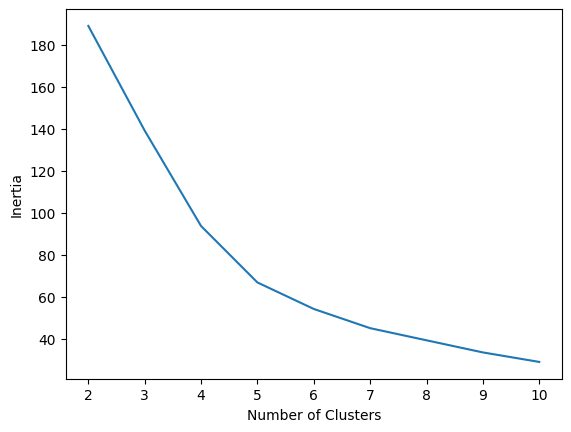

In [14]:
# Elbow-curve/SSD
# Importing the KMeans module from sklearn
from sklearn.cluster import KMeans

# Initialize an empty list to store the sum of squared distances (SSD) for different values of k
ssd = []

# Loop through a range of values for k, from 2 to 10
for k in range(2, 11):
    # Create a KMeans model with k clusters and a maximum of 50 iterations
    kmean = KMeans(n_clusters=k, max_iter=50).fit(df_scaled)
    
    # Calculate and append the sum of squared distances (inertia) to the ssd list
    ssd.append([k, kmean.inertia_])
    
    # Print the inertia value for the current k
    print(f"For n_clusters={k}, the kmeans.inertia_ is {kmean.inertia_}")

# Create a DataFrame from the SSD data
ssd = pd.DataFrame(ssd)

# Plot the values of k against the corresponding sum of squared distances (SSD)
plt.plot(ssd[0], ssd[1])
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Display the plot
plt.show()

#### Inferences:
- From the elbow curve above we can see that we have a breakpoint at 4 and one breakpoint at 5

#### Finding the optimal Number of Clusters
- Silhouette Analysis

For n_clusters = 2, the Silhouette score is 0.5499675045592958
For n_clusters = 3, the Silhouette score is 0.4828780118602133
For n_clusters = 4, the Silhouette score is 0.5319711296604154
For n_clusters = 5, the Silhouette score is 0.5398904798071446
For n_clusters = 6, the Silhouette score is 0.4195510352477881
For n_clusters = 7, the Silhouette score is 0.4116176296314651


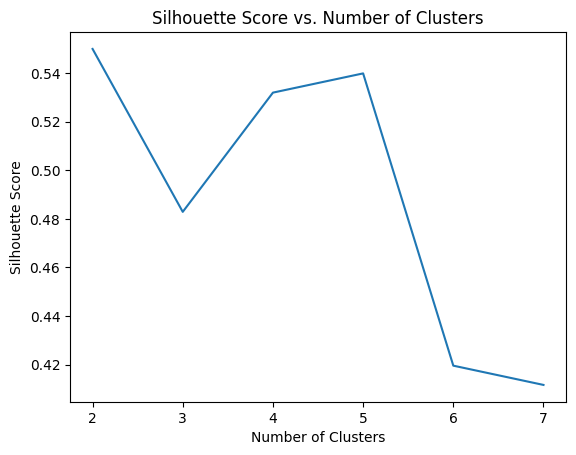

In [15]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty list to store silhouette scores
ss = []

# Loop through a range of cluster numbers from 2 to 7
for num_clusters in range(2, 8):
    # Initialize KMeans with the specified number of clusters, maximum iterations, and a 
    # random state
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=0).fit(df_scaled)

    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    
    # Append the number of clusters and the corresponding silhouette score to the list
    ss.append([num_clusters, silhouette_avg])

    # Print the silhouette score for the current number of clusters
    print(f"For n_clusters = {num_clusters}, the Silhouette score is {silhouette_avg}")

# Create a DataFrame to store silhouette scores
silhouette_df = pd.DataFrame(ss, columns=['Number of Clusters', 'Silhouette Score'])

# Plot the silhouette scores
plt.plot(silhouette_df['Number of Clusters'], silhouette_df['Silhouette Score'])
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()


#### Inferences:

- From the plot of Silhouette score above, we can see that we have the maximum Silhouette Score at 3, Selecting k = 3

In [16]:
# Import the KMeans clustering algorithm
from sklearn.cluster import KMeans

# Initialize KMeans with the number of clusters (K) set to 5, maximum iterations, 
# and a random state
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=0)

# Fit the KMeans model to the scaled data (df_scaled)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=0)

In [17]:
# Checking count of labels
len(kmeans.labels_)

8724

In [18]:
# Checking labels
kmeans.labels_

array([2, 2, 0, ..., 2, 0, 0])

In [19]:
# Assigning the labels
df_openFDA['cluster_id'] = kmeans.labels_

# Checking dataframe
df_openFDA.head()

,state,root_cause_description,openfda.device_class,time_duration,event_month_posted,event_year_posted,day_of_week_posted,event_month_terminated,event_year_terminated,day_of_week_terminated,product_quantity_cleaned,cost_to_recall_in_dollers,distribution,cleaned_reason_for_recall,cleaned_product_description,cleaned_action,cluster_id
0,IL,Device Design,Class II,648,11,2007,5,8,2009,2,311,248800.00,Worldwide distribution,biologic system corp camera pole may weaken an...,biologic system corp telescoping camera pole a...,biologic sent a safety alert letters dated to...,2
1,WA,Software design,Class III,641,1,2009,0,10,2010,4,19,16264.00,Nationwide distribution,an issue associated with the timed scan applic...,neuviz dual multislice computed tomography ct ...,a letter was issued to customers prior to the ...,2
2,CA,Device Design,Class III,415,10,2009,0,11,2010,2,2246,1078080.00,Worldwide distribution,failure product can kink or ovalize which may ...,penumbra neuron delivery catheter percutaneo...,the firm issued an urgent voluntary field remo...,0
3,IL,Device Design,Class II,776,10,2010,1,11,2012,0,221097,4421.94,Nationwide distribution,the fda sent a letter to baxter on april ord...,baxter colleague single channel volumetric inf...,baxter healthcare corporation sent urgent prod...,2
4,CO,Labeling design,Class II,0,10,2011,0,10,2011,0,6,5562.00,Worldwide distribution,distal end of tactile probe may break off duri...,probe tactile left asm long \npart s \nmedtron...,medtronic sent an urgent product safety notice...,0


In [20]:
# Counting cluster_id value count
df_openFDA['cluster_id'].value_counts()

cluster_id
0    5465
2    2336
1     923
Name: count, dtype: int64

### Cluster Visualization

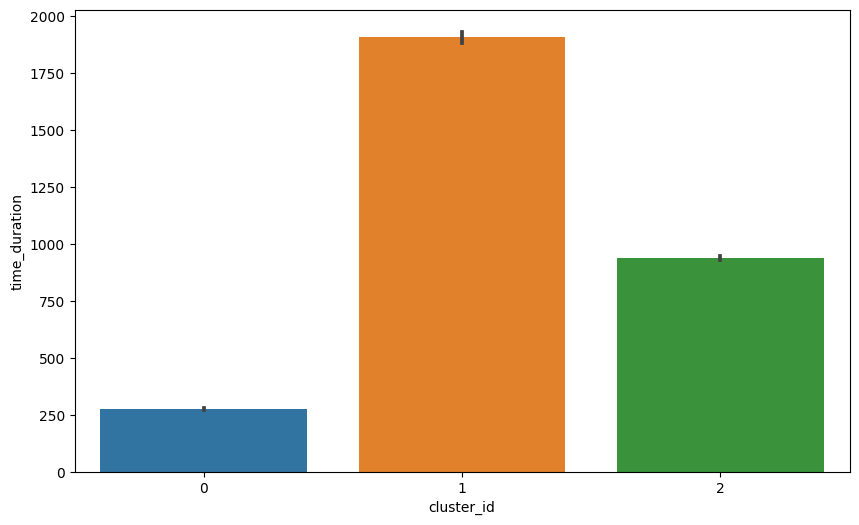

In [21]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize 'time_duration' across different clusters
sns.barplot(x='cluster_id', y='time_duration', data=df_openFDA)

# Display the plot
plt.show()


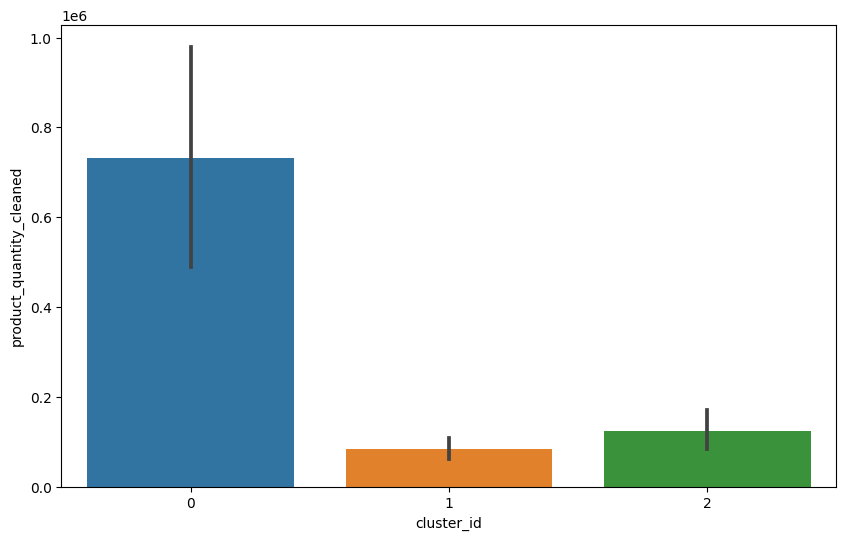

In [22]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize 'product_quantity_cleaned' across different clusters
sns.barplot(x = 'cluster_id', y = 'product_quantity_cleaned', data = df_openFDA)

# Display the plot
plt.show()

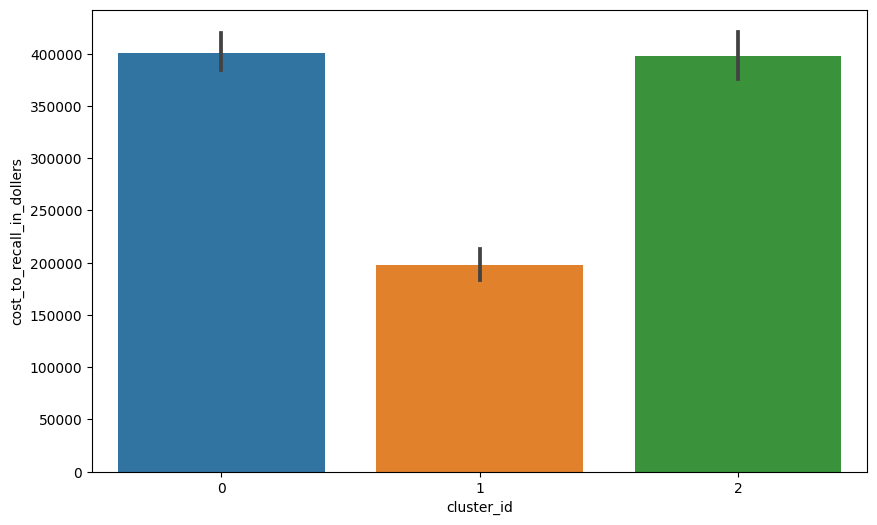

In [23]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a bar plot to visualize 'cost_to_recall_in_dollers' across different cluster
sns.barplot(x = 'cluster_id', y = 'cost_to_recall_in_dollers', data = df_openFDA)

# Display the plot
plt.show()

In [24]:
df_openFDA.head()

,state,root_cause_description,openfda.device_class,time_duration,event_month_posted,event_year_posted,day_of_week_posted,event_month_terminated,event_year_terminated,day_of_week_terminated,product_quantity_cleaned,cost_to_recall_in_dollers,distribution,cleaned_reason_for_recall,cleaned_product_description,cleaned_action,cluster_id
0,IL,Device Design,Class II,648,11,2007,5,8,2009,2,311,248800.00,Worldwide distribution,biologic system corp camera pole may weaken an...,biologic system corp telescoping camera pole a...,biologic sent a safety alert letters dated to...,2
1,WA,Software design,Class III,641,1,2009,0,10,2010,4,19,16264.00,Nationwide distribution,an issue associated with the timed scan applic...,neuviz dual multislice computed tomography ct ...,a letter was issued to customers prior to the ...,2
2,CA,Device Design,Class III,415,10,2009,0,11,2010,2,2246,1078080.00,Worldwide distribution,failure product can kink or ovalize which may ...,penumbra neuron delivery catheter percutaneo...,the firm issued an urgent voluntary field remo...,0
3,IL,Device Design,Class II,776,10,2010,1,11,2012,0,221097,4421.94,Nationwide distribution,the fda sent a letter to baxter on april ord...,baxter colleague single channel volumetric inf...,baxter healthcare corporation sent urgent prod...,2
4,CO,Labeling design,Class II,0,10,2011,0,10,2011,0,6,5562.00,Worldwide distribution,distal end of tactile probe may break off duri...,probe tactile left asm long \npart s \nmedtron...,medtronic sent an urgent product safety notice...,0


In [25]:
# Calculate the mean values of selected columns grouped by 'cluster_id'
cluster_means = df_openFDA[['time_duration', 
                            'product_quantity_cleaned', 
                            'cost_to_recall_in_dollers', 
                            'cluster_id']].groupby(by='cluster_id').mean()

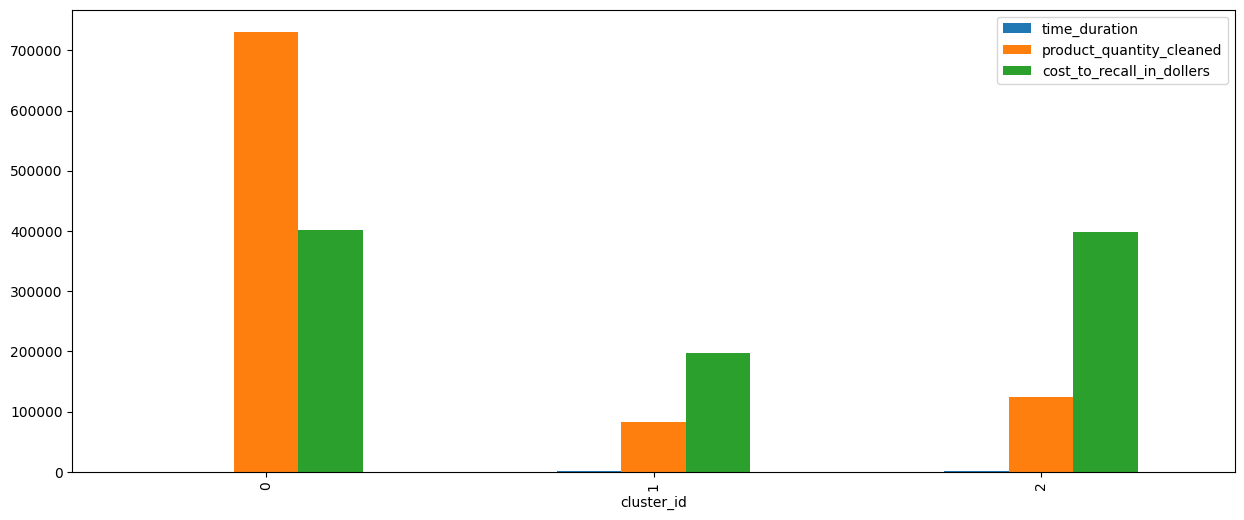

In [26]:
# Calculate and plot the mean values of selected columns grouped by 'cluster_id' using a bar plot
cluster_means.plot(kind='bar', figsize=(15, 6))

# Display the plot
plt.show()

In [27]:
df_openFDA.columns

Index(['state', 'root_cause_description', 'openfda.device_class',
       'time_duration', 'event_month_posted', 'event_year_posted',
       'day_of_week_posted', 'event_month_terminated', 'event_year_terminated',
       'day_of_week_terminated', 'product_quantity_cleaned',
       'cost_to_recall_in_dollers', 'distribution',
       'cleaned_reason_for_recall', 'cleaned_product_description',
       'cleaned_action', 'cluster_id'],
      dtype='object')